In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,Activation
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.python.keras.utils import np_utils
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:
# loading in the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
print('size of the training dataset {}'.format(X_train.shape))
print('size of test data {}'.format(X_test.shape))

size of the training dataset (50000, 32, 32, 3)
size of test data (10000, 32, 32, 3)


In [5]:
print('size of train class {}'.format(y_train.shape))
print('size of test class {}'.format(y_test.shape))

size of train class (50000, 1)
size of test class (10000, 1)


In [6]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))

In [7]:
print('Total classes {}'.format(num_classes))

Total classes 10


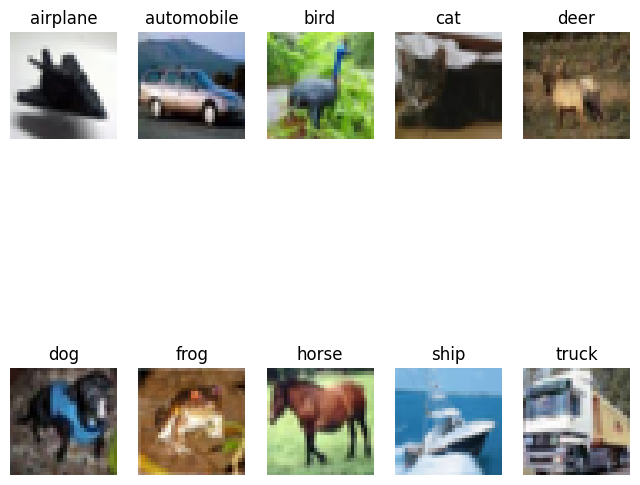

In [8]:
#plotting 10 images represents each class from train data
plt.figure(figsize=(8,8))
for i in range (num_classes):
  ax = plt.subplot(2,5,i+1)
  idx = np.where(y_train[:]==i)[0]
  features_idx = X_train[idx,::]
  plt.imshow(features_idx[0])
  ax.set_title(class_names[i])
  plt.axis("off")

In [9]:
#normalizing the input from 0 to 255 to between 0 to 1 bu dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [11]:
model = Sequential([
    layers.Conv2D(32,(3,3),input_shape = X_train.shape[1:],padding = 'same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(num_classes,activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [14]:
seed = 21
np.random.seed(seed)
epochs=100
batch_size = 32
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size = batch_size)

Epoch 1/100
1563/1563 [==============================] - 124s 77ms/step - loss: 0.2307 - accuracy: 0.4588 - val_loss: 0.1777 - val_accuracy: 0.6114
Epoch 2/100
1563/1563 [==============================] - 90s 57ms/step - loss: 0.1718 - accuracy: 0.6263 - val_loss: 0.1538 - val_accuracy: 0.6715
Epoch 3/100
1563/1563 [==============================] - 86s 55ms/step - loss: 0.1479 - accuracy: 0.6864 - val_loss: 0.1425 - val_accuracy: 0.7052
Epoch 4/100
1563/1563 [==============================] - 84s 54ms/step - loss: 0.1329 - accuracy: 0.7218 - val_loss: 0.1334 - val_accuracy: 0.7251
Epoch 5/100
1563/1563 [==============================] - 83s 53ms/step - loss: 0.1224 - accuracy: 0.7462 - val_loss: 0.1321 - val_accuracy: 0.7242
Epoch 6/100
1563/1563 [==============================] - 82s 53ms/step - loss: 0.1141 - accuracy: 0.7677 - val_loss: 0.1245 - val_accuracy: 0.7447
Epoch 7/100
1563/1563 [==============================] - 81s 52ms/step - loss: 0.1068 - accuracy: 0.7852 - val_loss: 

1/1 [==============================] - 0s 21ms/step
This image is most likely belongs to horse with a 20.23 percent confidence
Image after resizing to 32 x 32
1/1 [==============================] - 0s 22ms/step
This image is most likely belongs to airplane with a 10.00 percent confidence
Image after resizing to 32 x 32
1/1 [==============================] - 0s 22ms/step
This image is most likely belongs to automobile with a 23.20 percent confidence
Image after resizing to 32 x 32
1/1 [==============================] - 0s 23ms/step
This image is most likely belongs to airplane with a 23.20 percent confidence
Image after resizing to 32 x 32
1/1 [==============================] - 0s 22ms/step
This image is most likely belongs to automobile with a 23.20 percent confidence
Image after resizing to 32 x 32
1/1 [==============================] - 0s 26ms/step
This image is most likely belongs to airplane with a 10.00 percent confidence
Image after resizing to 32 x 32


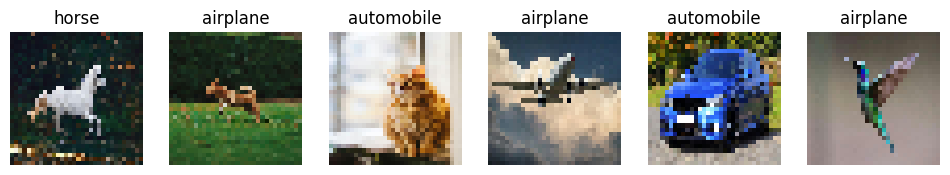

In [27]:
url_dict = {
    'Horse':'D:\\ML\\pexels-helena-lopes-1996333.jpg',
    'Dog':'D:\\ML\\pexels-matheus-bertelli-1906153.jpg',
    'Cat':'D:\\ML\\pexels-evg-kowalievska-1170986.jpg',
    'Airplane':'D:\\ML\\pexels-pixabay-46148.jpg',
    'Automobile':'D:\\ML\\pexels-mike-bird-170811.jpg',
    'Bird':'D:\\ML\\pexels-pixabay-349758.jpg'
    #'Deer':'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.britannica.com%2Fanimal%2Fdeer&psig=AOvVaw1mrfgPPAIzN7cmSrxEHplQ&ust=1713010702023000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCNDYuafUvIUDFQAAAAAdAAAAABAE'
}

i = 0
plt.figure(figsize=(12,6))
for key,path in url_dict.items():
  url = path
  i+=1
#   path = tf.keras.utils.get_file(key,origin=url)
  img = keras.preprocessing.image.load_img(path,target_size=(32,32))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array,0) # create a batch

  prediction = model.predict(img_array)
  score = tf.nn.softmax(prediction[0])

  #logging predictio  information
  predicted_label = class_names[np.argmax(score)]
  confidence = 100* np.max(score)
  print(
      f"This image is most likely belongs to {predicted_label} with a {confidence:.2f} percent confidence")
  # in print we can use .format(class_names[np.argmax(score)],100* np.argmax(score)) this also
  print("Image after resizing to 32 x 32")
  ax = plt.subplot(1,6,i)
  plt.imshow(img)
  plt.title(predicted_label)
  ax.set_title(class_names[np.argmax(score)])
  plt.axis('off')
plt.show()